# **Finding the most suitable area in Mumbai to open a restaurant**

## Introduction

      The main objective of this project is to show the most appropraite area in mumbai where one can establish a successful restaurant business. It would enable people new to the cattering business to make economically rich decisions.  
      Mumbai is a cosmopolitan city known for its many lip-smacking dishes. Be it vegetarian or non-vegetarian, the dishes in Mumbai boast of rich taste, fieriness and impressive flavors. The cuisine of Mumbai covers a large assortment of interesting, authentic dishes and zesty seafood dishes. The staple foods consumed by the residents of Mumbai include rice, aromatic fish curries, Indian bread (chapatis and rotis), vegetable curries, pulses and desserts. Coconuts, cashew nuts, peanuts and peanut oil are some of the major ingredients used in many of Mumbai's traditional dishes. Mumbai houses many restaurants where people can enjoy some amazing food. The city is known for its delectable chaats at the various food stalls in the busy streets of Mumbai.


## Data

Data about the neighborhoods in Mumbai was scraped from  https://en.wikipedia.org/wiki/List_of_neighbourhoods_in_Mumbai. The data was processed and cleaned in order to make a usable dataframe. 
Foursquare API was used to recommend the popular neighborhoods in Mumbai.

installing libraries

In [1]:
!pip install geopy
!pip install geocoder
!pip install folium

import numpy as np
import pandas as pd
import json
from geopy.geocoders import Nominatim
import geocoder
import requests
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
import folium
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.io.json import json_normalize
from sklearn.metrics import silhouette_score

%matplotlib notebook

print('All libraries imported.')

All libraries imported.


**Scraping data from Wikipedia**

In [20]:
df = pd.read_html('https://en.wikipedia.org/wiki/List_of_neighbourhoods_in_Mumbai')[-1]
df.rename(columns={'Area': 'Neighborhood'}, inplace=True)
df.head(10)

,Neighborhood,Location,Latitude,Longitude
0,Amboli,"Andheri,Western Suburbs",19.129300,72.843400
1,"Chakala, Andheri",Western Suburbs,19.111388,72.860833
2,D.N. Nagar,"Andheri,Western Suburbs",19.124085,72.831373
3,Four Bungalows,"Andheri,Western Suburbs",19.124714,72.827210
4,Lokhandwala,"Andheri,Western Suburbs",19.130815,72.829270
5,Marol,"Andheri,Western Suburbs",19.119219,72.882743
6,Sahar,"Andheri,Western Suburbs",19.098889,72.867222
7,Seven Bungalows,"Andheri,Western Suburbs",19.129052,72.817018
8,Versova,"Andheri,Western Suburbs",19.120000,72.820000
9,Mira Road,"Mira-Bhayandar,Western Suburbs",19.284167,72.871111


**Processing the above data**

In [21]:
df['Location'].value_counts()

South Mumbai                       30
Andheri,Western Suburbs             8
Western Suburbs                     6
Eastern Suburbs                     4
Ghatkopar,Eastern Suburbs           3
Mira-Bhayandar,Western Suburbs      3
Powai,Eastern Suburbs               3
Bandra,Western Suburbs              3
Kandivali West,Western Suburbs      3
Goregaon,Western Suburbs            2
Harbour Suburbs                     2
Kalbadevi,South Mumbai              2
Khar,Western Suburbs                2
Vasai,Western Suburbs               2
Malad,Western Suburbs               2
Borivali (West),Western Suburbs     2
Mumbai                              2
Mulund,Eastern Suburbs              1
Govandi,Harbour Suburbs             1
Fort,South Mumbai                   1
Sanctacruz,Western Suburbs          1
Tardeo,South Mumbai                 1
Kandivali East,Western Suburbs      1
Dadar,South Mumbai                  1
Colaba,South Mumbai                 1
Kurla,Eastern Suburbs               1
Antop Hill,S

In [22]:
df['Location'] = df['Location'].apply(lambda x: x.split(',')[-1])
df.head(10)

,Neighborhood,Location,Latitude,Longitude
0,Amboli,Western Suburbs,19.129300,72.843400
1,"Chakala, Andheri",Western Suburbs,19.111388,72.860833
2,D.N. Nagar,Western Suburbs,19.124085,72.831373
3,Four Bungalows,Western Suburbs,19.124714,72.827210
4,Lokhandwala,Western Suburbs,19.130815,72.829270
5,Marol,Western Suburbs,19.119219,72.882743
6,Sahar,Western Suburbs,19.098889,72.867222
7,Seven Bungalows,Western Suburbs,19.129052,72.817018
8,Versova,Western Suburbs,19.120000,72.820000
9,Mira Road,Western Suburbs,19.284167,72.871111


In [7]:
df['Location'].value_counts()

South Mumbai       39
Western Suburbs    36
Eastern Suburbs    12
Harbour Suburbs     4
Mumbai              2
Name: Location, dtype: int64

**Usable dataframe generated**

In [10]:
df

,Neighborhood,Location,Latitude,Longitude
0,Amboli,Western Suburbs,19.129300,72.843400
1,"Chakala, Andheri",Western Suburbs,19.111388,72.860833
2,D.N. Nagar,Western Suburbs,19.124085,72.831373
3,Four Bungalows,Western Suburbs,19.124714,72.827210
4,Lokhandwala,Western Suburbs,19.130815,72.829270
...,...,...,...,...
88,Parel,South Mumbai,18.990000,72.840000
89,Gowalia Tank,South Mumbai,18.962450,72.809703
90,Dava Bazaar,South Mumbai,18.946882,72.831362
91,Dharavi,Mumbai,19.040208,72.850850


*Reconfirming coordinates with Geocoder*

In [11]:
df['Latitude1'] = None
df['Longitude1'] = None

for i, neigh in enumerate(df['Neighborhood']):
    lat_lng_coords = None
    
    while(lat_lng_coords is None):
        g = geocoder.arcgis('{}, Mumbai, India'.format(neigh))
        lat_lng_coords = g.latlng
    
    if lat_lng_coords:
        latitude = lat_lng_coords[0]
        longitude = lat_lng_coords[1]
    
    df.loc[i, 'Latitude1'] = latitude
    df.loc[i, 'Longitude1'] = longitude

df.head(10)

,Neighborhood,Location,Latitude,Longitude,Latitude1,Longitude1
0,Amboli,Western Suburbs,19.129300,72.843400,19.1291,72.8464
1,"Chakala, Andheri",Western Suburbs,19.111388,72.860833,19.1084,72.8623
2,D.N. Nagar,Western Suburbs,19.124085,72.831373,19.1251,72.8325
3,Four Bungalows,Western Suburbs,19.124714,72.827210,19.1264,72.8242
4,Lokhandwala,Western Suburbs,19.130815,72.829270,19.1432,72.8249
5,Marol,Western Suburbs,19.119219,72.882743,19.1191,72.8828
6,Sahar,Western Suburbs,19.098889,72.867222,19.1027,72.8626
7,Seven Bungalows,Western Suburbs,19.129052,72.817018,19.1286,72.8212
8,Versova,Western Suburbs,19.120000,72.820000,19.1377,72.8135
9,Mira Road,Western Suburbs,19.284167,72.871111,19.2657,72.8707


In [12]:
df['Latdiff'] = abs(df['Latitude'] - df['Latitude1'])
df['Longdiff'] = abs(df['Longitude'] - df['Longitude1'])
df.head(10)

,Neighborhood,Location,Latitude,Longitude,Latitude1,Longitude1,Latdiff,Longdiff
0,Amboli,Western Suburbs,19.129300,72.843400,19.1291,72.8464,0.00024,0.00304
1,"Chakala, Andheri",Western Suburbs,19.111388,72.860833,19.1084,72.8623,0.003028,0.001497
2,D.N. Nagar,Western Suburbs,19.124085,72.831373,19.1251,72.8325,0.000965,0.001107
3,Four Bungalows,Western Suburbs,19.124714,72.827210,19.1264,72.8242,0.001666,0.00301
4,Lokhandwala,Western Suburbs,19.130815,72.829270,19.1432,72.8249,0.012345,0.0044
5,Marol,Western Suburbs,19.119219,72.882743,19.1191,72.8828,0.000169,6.7e-05
6,Sahar,Western Suburbs,19.098889,72.867222,19.1027,72.8626,0.00376476,0.00464166
7,Seven Bungalows,Western Suburbs,19.129052,72.817018,19.1286,72.8212,0.000492,0.004162
8,Versova,Western Suburbs,19.120000,72.820000,19.1377,72.8135,0.01769,0.00652
9,Mira Road,Western Suburbs,19.284167,72.871111,19.2657,72.8707,0.0184624,0.000418149


In [13]:
df.loc[df.Latdiff>0.001, 'Latitude'] = df.loc[df.Latdiff>0.001, 'Latitude1']
df.loc[df.Longdiff>0.001, 'Longitude'] = df.loc[df.Longdiff>0.001, 'Longitude1']
df.head(10)

,Neighborhood,Location,Latitude,Longitude,Latitude1,Longitude1,Latdiff,Longdiff
0,Amboli,Western Suburbs,19.1293,72.8464,19.1291,72.8464,0.00024,0.00304
1,"Chakala, Andheri",Western Suburbs,19.1084,72.8623,19.1084,72.8623,0.003028,0.001497
2,D.N. Nagar,Western Suburbs,19.1241,72.8325,19.1251,72.8325,0.000965,0.001107
3,Four Bungalows,Western Suburbs,19.1264,72.8242,19.1264,72.8242,0.001666,0.00301
4,Lokhandwala,Western Suburbs,19.1432,72.8249,19.1432,72.8249,0.012345,0.0044
5,Marol,Western Suburbs,19.1192,72.8827,19.1191,72.8828,0.000169,6.7e-05
6,Sahar,Western Suburbs,19.1027,72.8626,19.1027,72.8626,0.00376476,0.00464166
7,Seven Bungalows,Western Suburbs,19.1291,72.8212,19.1286,72.8212,0.000492,0.004162
8,Versova,Western Suburbs,19.1377,72.8135,19.1377,72.8135,0.01769,0.00652
9,Mira Road,Western Suburbs,19.2657,72.8711,19.2657,72.8707,0.0184624,0.000418149


In [14]:
df.where(df['Latitude']==df['Latitude1'])

,Neighborhood,Location,Latitude,Longitude,Latitude1,Longitude1,Latdiff,Longdiff
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Chakala, Andheri",Western Suburbs,19.1084,72.8623,19.1084,72.8623,0.003028,0.001497
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Four Bungalows,Western Suburbs,19.1264,72.8242,19.1264,72.8242,0.001666,0.00301
4,Lokhandwala,Western Suburbs,19.1432,72.8249,19.1432,72.8249,0.012345,0.0044
...,...,...,...,...,...,...,...,...
88,Parel,South Mumbai,18.9957,72.84,18.9957,72.8391,0.0057,0.00087
89,Gowalia Tank,South Mumbai,18.9645,72.8112,18.9645,72.8112,0.00201,0.001467
90,Dava Bazaar,South Mumbai,19.1314,72.927,19.1314,72.927,0.184518,0.095598
91,Dharavi,Mumbai,19.0467,72.8546,19.0467,72.8546,0.006532,0.00376


In [15]:
df.where(df['Longitude']==df['Longitude1'])

,Neighborhood,Location,Latitude,Longitude,Latitude1,Longitude1,Latdiff,Longdiff
0,Amboli,Western Suburbs,19.1293,72.8464,19.1291,72.8464,0.00024,0.00304
1,"Chakala, Andheri",Western Suburbs,19.1084,72.8623,19.1084,72.8623,0.003028,0.001497
2,D.N. Nagar,Western Suburbs,19.1241,72.8325,19.1251,72.8325,0.000965,0.001107
3,Four Bungalows,Western Suburbs,19.1264,72.8242,19.1264,72.8242,0.001666,0.00301
4,Lokhandwala,Western Suburbs,19.1432,72.8249,19.1432,72.8249,0.012345,0.0044
...,...,...,...,...,...,...,...,...
88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89,Gowalia Tank,South Mumbai,18.9645,72.8112,18.9645,72.8112,0.00201,0.001467
90,Dava Bazaar,South Mumbai,19.1314,72.927,19.1314,72.927,0.184518,0.095598
91,Dharavi,Mumbai,19.0467,72.8546,19.0467,72.8546,0.006532,0.00376


In [16]:
df.drop(['Latitude1', 'Longitude1', 'Latdiff', 'Longdiff'], axis=1, inplace=True)
df.head(10)

,Neighborhood,Location,Latitude,Longitude
0,Amboli,Western Suburbs,19.1293,72.8464
1,"Chakala, Andheri",Western Suburbs,19.1084,72.8623
2,D.N. Nagar,Western Suburbs,19.1241,72.8325
3,Four Bungalows,Western Suburbs,19.1264,72.8242
4,Lokhandwala,Western Suburbs,19.1432,72.8249
5,Marol,Western Suburbs,19.1192,72.8827
6,Sahar,Western Suburbs,19.1027,72.8626
7,Seven Bungalows,Western Suburbs,19.1291,72.8212
8,Versova,Western Suburbs,19.1377,72.8135
9,Mira Road,Western Suburbs,19.2657,72.8711


**Data Visualization** Areawise neighborhoods

In [17]:
neighborhoods_mumbai = df.groupby('Location')['Neighborhood'].nunique()
neighborhoods_mumbai

Location
Eastern Suburbs    12
Harbour Suburbs     4
Mumbai              2
South Mumbai       39
Western Suburbs    36
Name: Neighborhood, dtype: int64

<IPython.core.display.Javascript object>


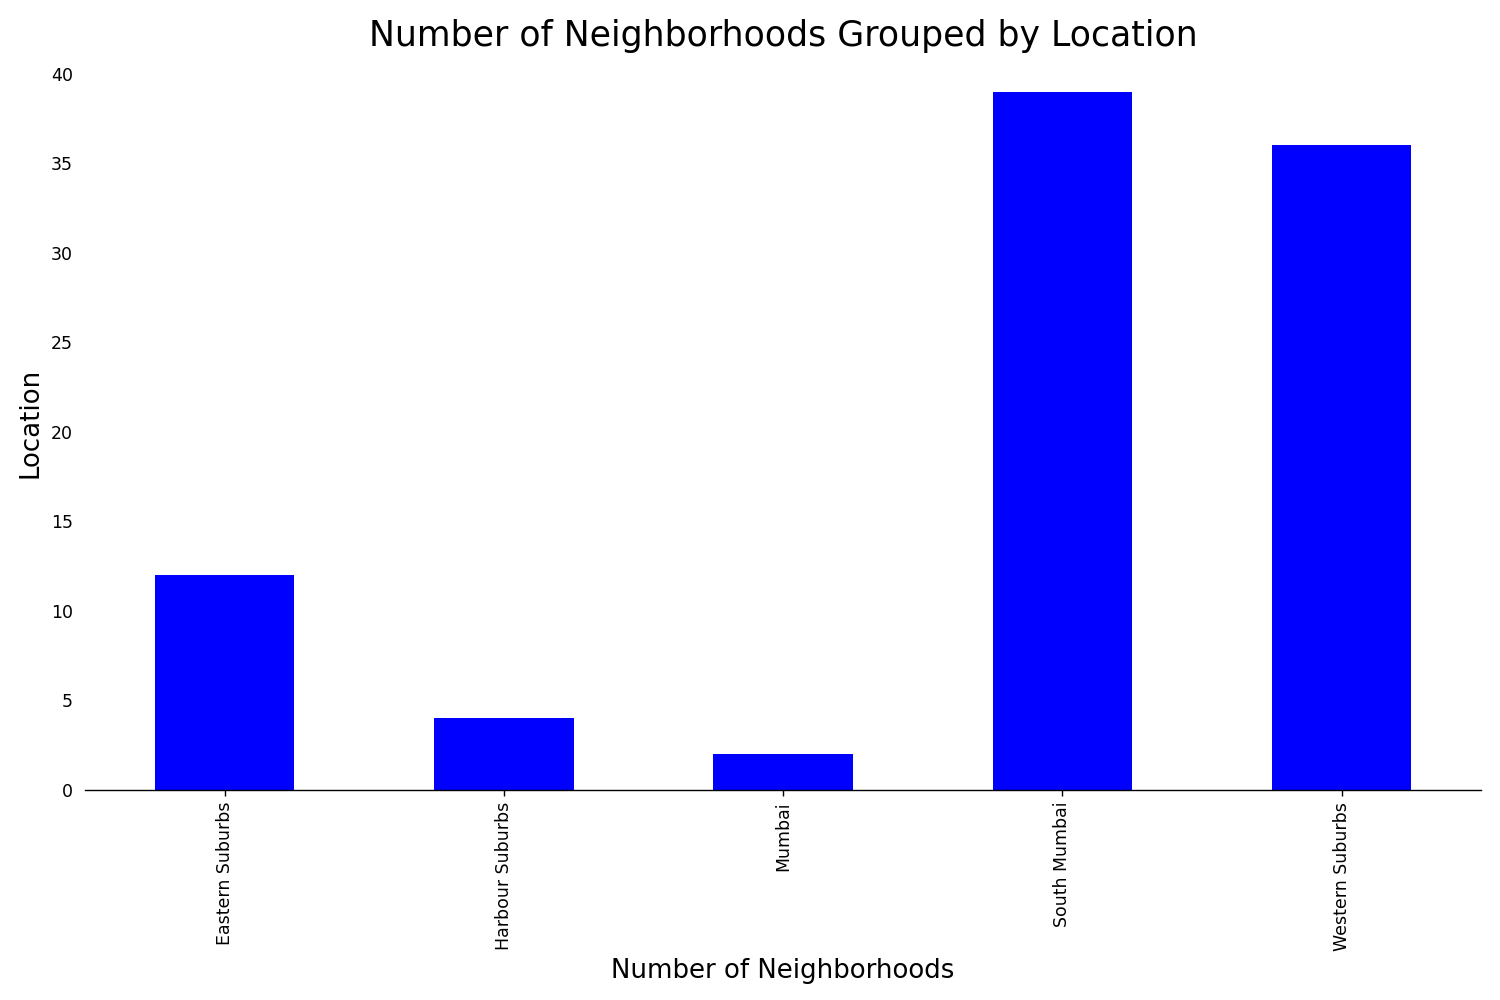

In [23]:
fig = plt.figure(figsize=(12,8))

ax = neighborhoods_mumbai.plot(kind='bar', color='blue')
ax.set_title('Number of Neighborhoods Grouped by Location', fontsize=20)
ax.set_xlabel('Number of Neighborhoods', fontsize=15)
ax.set_ylabel('Location', fontsize=15)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(which='major', left=False)

fig.tight_layout()

In [27]:
address = 'Mumbai, IN'
geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Mumbai are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Mumbai are 19.0759899, 72.8773928.


Plotting map of locations in Mumbai

In [28]:
map_mum = folium.Map(location=[latitude, longitude], zoom_start=10)

for lat, lng, location, neighborhood in zip(df['Latitude'], df['Longitude'], df['Location'], df['Neighborhood']):
    label = '{}, {}'.format(neighborhood, location)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_mum)  
    
map_mum

**Foursquare API**

In [29]:
CLIENT_ID = 'XJ1O5BOMLLBDRR40P0SCLX5FWTQYJQ1OHO4UA0RCWXCGVKS4'
CLIENT_SECRET = 'ZMBM5Z41FVCLVOAZRVQC5QV1RH0RG1WOZYQMJPWEMG0YIJRQ'
VERSION = '20201210'
LIMIT = 100

In [31]:
neighborhood_name = df.loc[0, 'Neighborhood']
neighborhood_lat = df.loc[0, 'Latitude']
neighborhood_long = df.loc[0, 'Longitude']

print("The neighborhood is {} and the latitude and longitude are {} latitude and {} longitude".format(neighborhood_name,
                                                                                                        neighborhood_lat, neighborhood_long))

The neighborhood is Amboli and the latitude and longitude are 19.1293 latitude and 72.8434 longitude


In [32]:
radius = 1000

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_lat, 
    neighborhood_long, 
    radius, 
    LIMIT)

In [33]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5fd27a3b7b92187a3b23259f'},
 'response': {'headerLocation': 'Jogeshwari West',
  'headerFullLocation': 'Jogeshwari West, Mumbai',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 33,
  'suggestedBounds': {'ne': {'lat': 19.13830000900001,
    'lng': 72.8529082359012},
   'sw': {'lat': 19.120299990999992, 'lng': 72.83389176409881}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '5174e2be498e39cf0d1c20cb',
       'name': 'Shawarma Factory',
       'location': {'address': 'Dadabhai Road',
        'crossStreet': 'Off JP Road, Near Navrang Cinema',
        'lat': 19.124590572173467,
        'lng': 72.8403981304492,
        'labeledLatLngs': [{'label': 'display',
          'lat': 19.124590572173467,
          'lng': 72.84039

Extracting categories of venues

In [34]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [35]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues)

filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues = nearby_venues.loc[:, filtered_columns]

nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  app.launch_new_instance()


,name,categories,lat,lng
0,Shawarma Factory,Falafel Restaurant,19.124591,72.840398
1,Jaffer Bhai's Delhi Darbar,Mughlai Restaurant,19.137714,72.845909
2,Cafe Arfa,Indian Restaurant,19.128930,72.847140
3,"5 Spice , Bandra",Chinese Restaurant,19.130421,72.847206
4,Pizza Express,Pizza Place,19.131893,72.834668


Generating nearby venues

In [36]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [37]:
mum_venues = getNearbyVenues(names=df['Neighborhood'], latitudes=df['Latitude'], longitudes=df['Longitude'], radius=radius)

Amboli
Chakala, Andheri
D.N. Nagar
Four Bungalows
Lokhandwala
Marol
Sahar
Seven Bungalows
Versova
Mira Road
Bhayandar
Uttan
Bandstand Promenade
Kherwadi
Pali Hill
I.C. Colony
Gorai
Dahisa
Aarey Milk Colony
Bangur Nagar
Jogeshwari West
Juhu
Charkop
Poisar
Mahavir Nagar
Thakur village
Pali Naka
Khar Danda
Dindoshi
Sunder Nagar
Kalina
Naigaon
Nalasopara
Virar
Irla
Vile Parle
Bhandup
Amrut Nagar
Asalfa
Pant Nagar
Kanjurmarg
Nehru Nagar
Nahur
Chandivali
Hiranandani Gardens
Indian Institute of Technology Bombay campus
Vidyavihar
Vikhroli
Chembur
Deonar
Mankhurd
Mahul
Agripada
Altamount Road
Bhuleshwar
Breach Candy
Carmichael Road
Cavel
Churchgate
Cotton Green
Cuffe Parade
Cumbala Hill
Currey Road
Dhobitalao
Dongri
Kala Ghoda
Kemps Corner
Lower Parel
Mahalaxmi
Mahim
Malabar Hill
Marine Drive
Marine Lines
Mumbai Central
Nariman Point
Prabhadevi
Sion
Walkeshwar
Worli
C.G.S. colony
Dagdi Chawl
Navy Nagar
Hindu colony
Ballard Estate
Chira Bazaar
Fanas Wadi
Chor Bazaar
Matunga
Parel
Gowalia Tank
D

Generating dataframe

In [38]:
print(mum_venues.shape)
mum_venues.head(10)

(3623, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Amboli,19.1293,72.8434,Shawarma Factory,19.124591,72.840398,Falafel Restaurant
1,Amboli,19.1293,72.8434,Jaffer Bhai's Delhi Darbar,19.137714,72.845909,Mughlai Restaurant
2,Amboli,19.1293,72.8434,Cafe Arfa,19.128930,72.847140,Indian Restaurant
3,Amboli,19.1293,72.8434,"5 Spice , Bandra",19.130421,72.847206,Chinese Restaurant
4,Amboli,19.1293,72.8434,Pizza Express,19.131893,72.834668,Pizza Place
5,Amboli,19.1293,72.8434,Courtyard Restaurant & Bar,19.131692,72.837269,Asian Restaurant
6,Amboli,19.1293,72.8434,Garden Court,19.127188,72.837478,Indian Restaurant
7,Amboli,19.1293,72.8434,Road House Bluez,19.127251,72.836045,Pub
8,Amboli,19.1293,72.8434,Shetty's Corner,19.124845,72.837858,Chinese Restaurant
9,Amboli,19.1293,72.8434,Persia Darbar,19.136952,72.846822,Indian Restaurant


In [39]:
mum_venues.groupby('Neighborhood', as_index=False).count()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Aarey Milk Colony,8,8,8,8,8,8
1,Agripada,23,23,23,23,23,23
2,Altamount Road,85,85,85,85,85,85
3,Amboli,33,33,33,33,33,33
4,Amrut Nagar,51,51,51,51,51,51
...,...,...,...,...,...,...,...
85,Vikhroli,5,5,5,5,5,5
86,Vile Parle,77,77,77,77,77,77
87,Virar,7,7,7,7,7,7
88,Walkeshwar,11,11,11,11,11,11


In [41]:
print("There are {} unique categories".format(mum_venues['Venue Category'].nunique()))

There are 220 unique categories


Analyzing the neighborhoods

In [43]:
mum_onehot = pd.get_dummies(mum_venues[['Venue Category']], prefix="", prefix_sep="")
mum_onehot.head()

,ATM,Accessories Store,Afghan Restaurant,Airport,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Amphitheater,Antique Shop,...,Train,Train Station,Travel & Transport,Vegetarian / Vegan Restaurant,Video Game Store,Wine Bar,Wine Shop,Women's Store,Yoga Studio,Zoo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
mum_onehot['Neighborhood'] = mum_venues['Neighborhood']
mum_onehot.head()

,ATM,Accessories Store,Afghan Restaurant,Airport,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Amphitheater,Antique Shop,...,Train,Train Station,Travel & Transport,Vegetarian / Vegan Restaurant,Video Game Store,Wine Bar,Wine Shop,Women's Store,Yoga Studio,Zoo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
temp = list(mum_onehot.columns)

if 'Neighborhood' in temp:
    temp.remove('Neighborhood')
    
fixed_columns = ['Neighborhood'] + temp
mum_onehot = mum_onehot[fixed_columns]

mum_onehot.head()

,Neighborhood,ATM,Accessories Store,Afghan Restaurant,Airport,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Amphitheater,...,Train,Train Station,Travel & Transport,Vegetarian / Vegan Restaurant,Video Game Store,Wine Bar,Wine Shop,Women's Store,Yoga Studio,Zoo
0,Amboli,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Amboli,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Amboli,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Amboli,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Amboli,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
mum_grouped = mum_onehot.groupby('Neighborhood', sort=False).mean().reset_index()
print(mum_grouped.shape)
mum_grouped.head(10)

(90, 220)


,Neighborhood,ATM,Accessories Store,Afghan Restaurant,Airport,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Amphitheater,...,Train,Train Station,Travel & Transport,Vegetarian / Vegan Restaurant,Video Game Store,Wine Bar,Wine Shop,Women's Store,Yoga Studio,Zoo
0,Amboli,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.030303,0.0,0.0,0.0,0.000000,0.0,0.0
1,"Chakala, Andheri",0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.050000,0.0,0.0,0.0,0.000000,0.0,0.0
2,D.N. Nagar,0.0,0.019608,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.058824,0.0,0.0,0.0,0.019608,0.0,0.0
3,Four Bungalows,0.0,0.021739,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.065217,0.0,0.0,0.0,0.021739,0.0,0.0
4,Lokhandwala,0.0,0.010417,0.0,0.000000,0.000000,0.000000,0.000000,0.010417,0.0,...,0.0,0.0,0.0,0.020833,0.0,0.0,0.0,0.010417,0.0,0.0
5,Marol,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
6,Sahar,0.0,0.000000,0.0,0.035088,0.070175,0.052632,0.052632,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
7,Seven Bungalows,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.036364,0.0,0.0,0.0,0.000000,0.0,0.0
8,Versova,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.032258,0.0,0.0,0.0,0.000000,0.0,0.0
9,Mira Road,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.035714,0.0,0.0,0.0,0.000000,0.0,0.0


Taking top 5 venues of all neighborhoods

In [47]:
num_top_venues = 5

for hood in mum_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = mum_grouped[mum_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Amboli----
                venue  freq
0   Indian Restaurant  0.15
1                 Bar  0.12
2         Pizza Place  0.09
3    Asian Restaurant  0.09
4  Chinese Restaurant  0.06


----Chakala, Andheri----
                venue  freq
0   Indian Restaurant  0.15
1               Hotel  0.15
2                Café  0.10
3  Seafood Restaurant  0.08
4         Pizza Place  0.05


----D.N. Nagar----
                           venue  freq
0                            Bar  0.14
1                    Pizza Place  0.08
2  Vegetarian / Vegan Restaurant  0.06
3                            Pub  0.06
4           Gym / Fitness Center  0.06


----Four Bungalows----
                           venue  freq
0              Indian Restaurant  0.09
1                            Pub  0.09
2                         Lounge  0.07
3  Vegetarian / Vegan Restaurant  0.07
4                    Coffee Shop  0.07


----Lokhandwala----
               venue  freq
0                Bar  0.08
1                Pub  0.07
2  In

                venue  freq
0                Park  0.25
1               Beach  0.12
2    Department Store  0.12
3    Asian Restaurant  0.12
4  Italian Restaurant  0.12


----Cumbala Hill----
               venue  freq
0               Café  0.08
1             Bakery  0.08
2  Indian Restaurant  0.06
3     Sandwich Place  0.06
4        Coffee Shop  0.06


----Currey Road----
               venue  freq
0  Indian Restaurant  0.09
1               Café  0.07
2      Shopping Mall  0.04
3        Coffee Shop  0.04
4         Restaurant  0.03


----Dhobitalao----
               venue  freq
0  Indian Restaurant  0.17
1      Train Station  0.07
2               Café  0.07
3             Bakery  0.06
4                Bar  0.06


----Dongri----
               venue  freq
0              Beach  0.33
1         Playground  0.17
2  Indian Restaurant  0.17
3             Resort  0.17
4        Bus Station  0.17


----Kala Ghoda----
                venue  freq
0   Indian Restaurant  0.16
1                Café  0

Generating top 5 common venues

In [48]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [49]:
num_top_venues = 5

indicators = ['st', 'nd', 'rd']

columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = mum_grouped['Neighborhood']

for ind in np.arange(mum_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(mum_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Amboli,Indian Restaurant,Bar,Pizza Place,Asian Restaurant,Coffee Shop
1,"Chakala, Andheri",Hotel,Indian Restaurant,Café,Seafood Restaurant,Fast Food Restaurant
2,D.N. Nagar,Bar,Pizza Place,Vegetarian / Vegan Restaurant,Pub,Gym / Fitness Center
3,Four Bungalows,Indian Restaurant,Pub,Coffee Shop,Lounge,Bar
4,Lokhandwala,Bar,Pub,Coffee Shop,Indian Restaurant,Pizza Place
...,...,...,...,...,...,...
85,Parel,Plaza,Indian Restaurant,Multiplex,Fast Food Restaurant,Roof Deck
86,Gowalia Tank,Indian Restaurant,Bakery,Café,Coffee Shop,Fast Food Restaurant
87,Dava Bazaar,Indian Restaurant,Café,Coffee Shop,Bar,Fast Food Restaurant
88,Dharavi,Indian Restaurant,Bakery,Fast Food Restaurant,Coffee Shop,Pizza Place


## Clustering using KMean

In [69]:
def plot(x, y):
    fig = plt.figure(figsize=(8,4))
    plt.plot(x, y, 'o-')
    plt.xlabel('Number of clusters')
    plt.ylabel('Scores')
    plt.title('Optimum Number of Clusters')
    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

In [70]:
maxk = 15
scores = []
kval = []

for k in range(2, maxk+1):
    cl_df = mum_grouped.drop('Neighborhood', axis=1)
    kmeans = KMeans(n_clusters=k, init="k-means++", random_state=40).fit_predict(cl_df) #Choose any random_state
    
    score = silhouette_score(cl_df, kmeans, metric='euclidean', random_state=0)
    kval.append(k)
    scores.append(score)

Finding out optimum number of clusters

[0.4026289844825166, 0.5747466006213189, 0.2878637626356315, 0.0761687826310182, 0.08212387738800486, 0.10655451637250653, 0.10190870712539452, 0.10047677405106875, 0.09681255196874597, 0.0963686105019844, -0.008279893666023816, 0.07442076163400477, 0.10084693165818812, 0.08641100026135685]
[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]


<IPython.core.display.Javascript object>


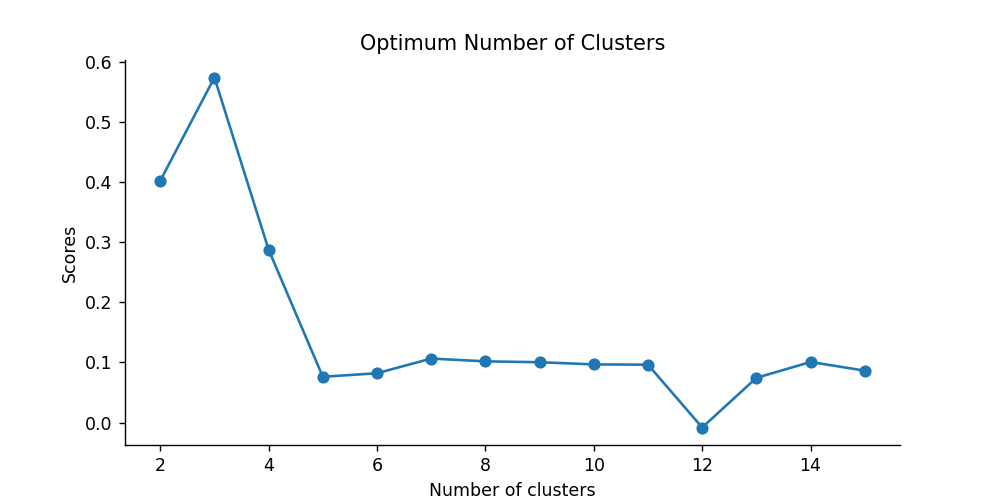

In [71]:
print(scores)
print(kval)
plot(kval, scores)

Hence, number of optimum clusters are 3

In [72]:
k = 3

mum_clustering = mum_grouped.drop('Neighborhood', axis=1)
kmeans = KMeans(n_clusters=k, init="k-means++", random_state=40).fit(mum_clustering) #Can choose any random_state

kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

Creating new dataframe with cluster tables and top 10 venues.

In [73]:
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
mum_merged = df
mum_merged = mum_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

ValueError: cannot insert Cluster Labels, already exists

In [74]:
print(mum_merged.shape)
mum_merged

(93, 10)


,Neighborhood,Location,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Amboli,Western Suburbs,19.129300,72.843400,1.0,Indian Restaurant,Bar,Pizza Place,Asian Restaurant,Coffee Shop
1,"Chakala, Andheri",Western Suburbs,19.111388,72.860833,1.0,Hotel,Indian Restaurant,Café,Seafood Restaurant,Fast Food Restaurant
2,D.N. Nagar,Western Suburbs,19.124085,72.831373,1.0,Bar,Pizza Place,Vegetarian / Vegan Restaurant,Pub,Gym / Fitness Center
3,Four Bungalows,Western Suburbs,19.124714,72.827210,1.0,Indian Restaurant,Pub,Coffee Shop,Lounge,Bar
4,Lokhandwala,Western Suburbs,19.130815,72.829270,1.0,Bar,Pub,Coffee Shop,Indian Restaurant,Pizza Place
...,...,...,...,...,...,...,...,...,...,...
88,Parel,South Mumbai,18.990000,72.840000,1.0,Plaza,Indian Restaurant,Multiplex,Fast Food Restaurant,Roof Deck
89,Gowalia Tank,South Mumbai,18.962450,72.809703,1.0,Indian Restaurant,Bakery,Café,Coffee Shop,Fast Food Restaurant
90,Dava Bazaar,South Mumbai,18.946882,72.831362,1.0,Indian Restaurant,Café,Coffee Shop,Bar,Fast Food Restaurant
91,Dharavi,Mumbai,19.040208,72.850850,1.0,Indian Restaurant,Bakery,Fast Food Restaurant,Coffee Shop,Pizza Place


## **Cluster 1**

In [75]:
mum_merged.loc[mum_merged['Cluster Labels'] == 0, mum_merged.columns[[0] + [1] + list(range(5, mum_merged.shape[1]))]]

,Neighborhood,Location,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
32,Nalasopara,Western Suburbs,Bar,Bus Station,Zoo,Dhaba,Farm


## **Cluster 2**

In [77]:
mum_merged.loc[mum_merged['Cluster Labels'] == 1, mum_merged.columns[[0] + [1] + list(range(5, mum_merged.shape[1]))]]

,Neighborhood,Location,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Amboli,Western Suburbs,Indian Restaurant,Bar,Pizza Place,Asian Restaurant,Coffee Shop
1,"Chakala, Andheri",Western Suburbs,Hotel,Indian Restaurant,Café,Seafood Restaurant,Fast Food Restaurant
2,D.N. Nagar,Western Suburbs,Bar,Pizza Place,Vegetarian / Vegan Restaurant,Pub,Gym / Fitness Center
3,Four Bungalows,Western Suburbs,Indian Restaurant,Pub,Coffee Shop,Lounge,Bar
4,Lokhandwala,Western Suburbs,Bar,Pub,Coffee Shop,Indian Restaurant,Pizza Place
...,...,...,...,...,...,...,...
88,Parel,South Mumbai,Plaza,Indian Restaurant,Multiplex,Fast Food Restaurant,Roof Deck
89,Gowalia Tank,South Mumbai,Indian Restaurant,Bakery,Café,Coffee Shop,Fast Food Restaurant
90,Dava Bazaar,South Mumbai,Indian Restaurant,Café,Coffee Shop,Bar,Fast Food Restaurant
91,Dharavi,Mumbai,Indian Restaurant,Bakery,Fast Food Restaurant,Coffee Shop,Pizza Place


## **Cluster 3**

In [78]:
mum_merged.loc[mum_merged['Cluster Labels'] == 2, mum_merged.columns[[0] + [1] + list(range(5, mum_merged.shape[1]))]]

,Neighborhood,Location,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
68,Mahalaxmi,South Mumbai,Arcade,Zoo,Dessert Shop,Farm,Falafel Restaurant


## **Conclusion**

In [ ]:
It is clearly visible th

In [80]:
new_restaurant_neighborhoods = mum_merged.loc[mum_merged['Cluster Labels'] == 0, mum_merged.columns[[0, 1, 2, 3] + list(range(5, mum_merged.shape[1]))]]
map_res_locations = folium.Map(location=[latitude, longitude], zoom_start=10)

for lat, lng, location, neighborhood in zip(new_restaurant_neighborhoods['Latitude'], new_restaurant_neighborhoods['Longitude'],
                                            new_restaurant_neighborhoods['Location'], new_restaurant_neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, location)
    folium.Marker([lat, lng], popup='{} has geographical coordinates ({:.4f}, {:.4f})'.format(label, lat, lng),
                  icon=folium.Icon(color='lightred'), tooltip=label).add_to(map_res_locations)
    
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='yellow',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_res_locations) 

map_res_locations